<a href="https://colab.research.google.com/github/SquirrelMan/svm_sentiment/blob/master/svm_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip uninstall statsmodels -y
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels
# 模型相关包
import statsmodels.api as sm
import statsmodels.stats.diagnostic
# 画图包
import matplotlib.pyplot as plt
# 其他包
import pandas as pd
import numpy as np

#--------------------- 
#作者：mooncrystal123 
#来源：CSDN 
#原文：https://blog.csdn.net/mooncrystal123/article/details/86736397 
#版权声明：本文为博主原创文章，转载请附上博文链接！

Uninstalling statsmodels-0.9.0:
  Successfully uninstalled statsmodels-0.9.0
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-9i5hr1mz
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-9i5hr1mz
  Stored in directory: /tmp/pip-ephem-wheel-cache-welr3z8e/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels


In [0]:
# https://keras.io/
!pip install -q keras
import keras
import tensorflow as tf
import math
import random
from google.colab import files
from __future__ import print_function
%matplotlib inline

Using TensorFlow backend.


In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2330_台積電_TW.csv to 2330_台積電_TW.csv
User uploaded file "2330_台積電_TW.csv" with length 16570 bytes


In [0]:
stk_data=pd.read_csv('2330_台積電_TW.csv')
stk_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,231.5,232.5,231.0,232.5,224.324173,18055269
1,2018-01-03,236.0,238.0,235.5,237.0,228.665939,29308091
2,2018-01-04,240.0,240.0,236.5,239.5,231.078018,29096613
3,2018-01-05,240.0,240.0,238.0,240.0,231.560440,22438255
4,2018-01-08,242.0,242.5,240.5,242.0,233.490112,20233692


In [0]:
stk_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
302,2019-04-08,251.0,253.0,250.5,253.0,253.0,45184821
303,2019-04-09,253.0,254.0,252.0,254.0,254.0,22355674
304,2019-04-10,253.0,254.5,252.0,254.0,254.0,25849934
305,2019-04-11,253.0,254.0,251.5,252.0,252.0,24896840
306,2019-04-12,251.5,253.0,251.0,252.0,252.0,13548148


In [0]:
stk_date=stk_data[:]['Date']
stk_open=stk_data[:]['Open']
stk_close=stk_data[:]['Close']
stk_adj_ratio=(stk_close-stk_open)/stk_open
stk_adj_ratio.tail()

302    0.007968
303    0.003953
304    0.003953
305   -0.003953
306    0.001988
dtype: float64

In [0]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(stk_close)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-2.4237
p-value,0.135157
Lags Used,0
Number of Observations Used,306
Critical Value(1%),-3.4519
Critical Value(5%),-2.87103
Critical Value(10%),-2.57183


In [0]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(stk_adj_ratio)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-19.7067
p-value,0
Lags Used,0
Number of Observations Used,306
Critical Value(1%),-3.4519
Critical Value(5%),-2.87103
Critical Value(10%),-2.57183


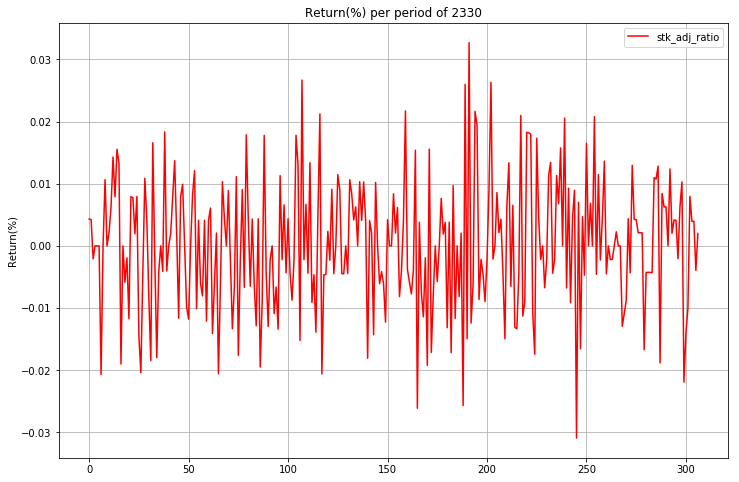

In [0]:
fig = plt.figure(figsize=(12,8))
plt.plot(stk_adj_ratio,'r',label='stk_adj_ratio')
plt.title('Return(%) per period of 2330')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Return(%)')
plt.show()

In [0]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hi_lo.csv to hi_lo.csv
User uploaded file "hi_lo.csv" with length 33030 bytes


In [0]:
hi_lo_data=pd.read_csv('hi_lo.csv')
hi_lo_data.head()

,date,hi_check9_count,lo_check9_count,hilo9,hi_check26_count,lo_check26_count,hilo26,arms9,arms26,ad9,ad26
0,2018-02-06,15,842,0.017503,8,726,0.010899,0.801583,0.445738,-827.0,-718.0
1,2018-02-07,28,72,0.280000,14,57,0.197183,1.566881,1.223397,-871.0,-761.0
2,2018-02-08,21,126,0.142857,6,108,0.052632,1.156681,0.738905,-976.0,-863.0
3,2018-02-09,14,606,0.022581,7,569,0.012153,1.415071,0.979620,-1568.0,-1425.0
4,2018-02-12,40,45,0.470588,18,40,0.310345,0.128391,0.069685,-1573.0,-1447.0


In [0]:
stk_hilo9=hi_lo_data[:]['hilo9']
stk_hilo26=hi_lo_data[:]['hilo26']
stk_arms9=hi_lo_data[:]['arms9']
stk_arms26=hi_lo_data[:]['arms26']
stk_ad9=hi_lo_data[:]['ad9']
stk_ad26=hi_lo_data[:]['ad26']

In [0]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(stk_hilo9)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-6.21415
p-value,5.41702e-08
Lags Used,0
Number of Observations Used,281
Critical Value(1%),-3.45384
Critical Value(5%),-2.87188
Critical Value(10%),-2.57228


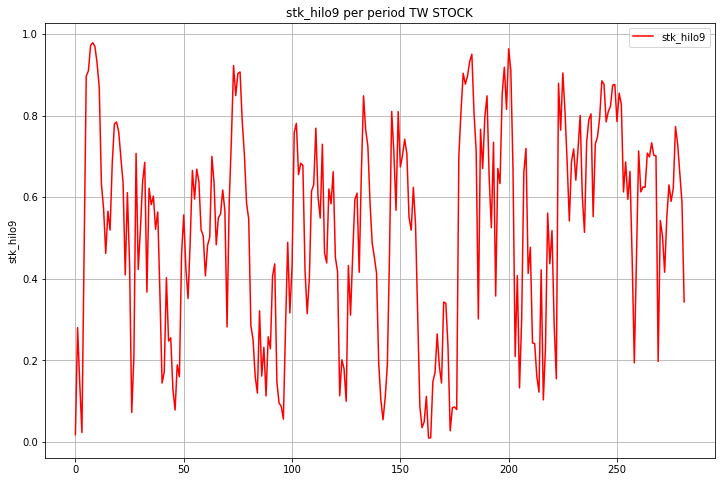

In [0]:
fig = plt.figure(figsize=(12,8))
plt.plot(stk_hilo9,'r',label='stk_hilo9')
plt.title('stk_hilo9 per period TW STOCK')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('stk_hilo9')
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(stk_hilo26)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-4.13214
p-value,0.00085661
Lags Used,1
Number of Observations Used,280
Critical Value(1%),-3.45392
Critical Value(5%),-2.87192
Critical Value(10%),-2.5723


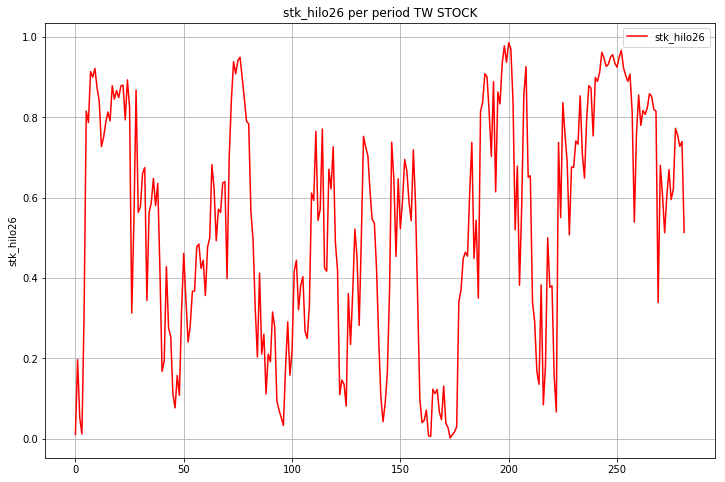

In [0]:
fig = plt.figure(figsize=(12,8))
plt.plot(stk_hilo26,'r',label='stk_hilo26')
plt.title('stk_hilo26 per period TW STOCK')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('stk_hilo26')
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(stk_arms9)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-6.37158
p-value,2.33801e-08
Lags Used,3
Number of Observations Used,278
Critical Value(1%),-3.45409
Critical Value(5%),-2.87199
Critical Value(10%),-2.57234


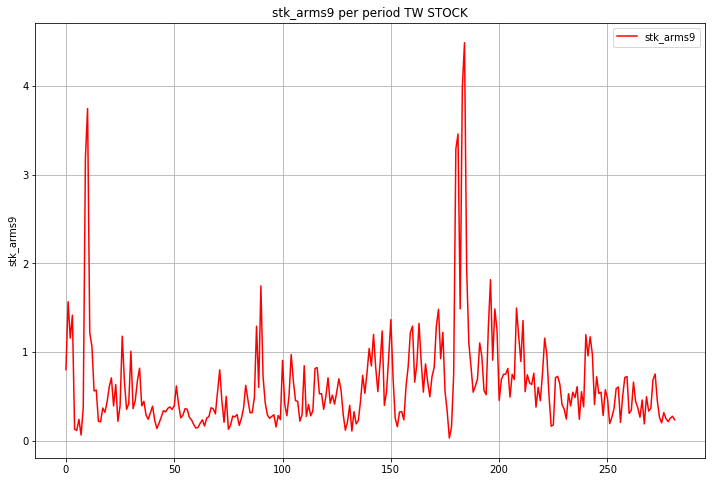

In [0]:
fig = plt.figure(figsize=(12,8))
plt.plot(stk_arms9,'r',label='stk_arms9')
plt.title('stk_arms9 per period TW STOCK')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('stk_arms9')
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller
from scipy import signal
mm_stk_arms26=stk_arms26.shift(1)/stk_arms26
mm_stk_arms26=mm_stk_arms26[1:]
temp = np.array(mm_stk_arms26)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-9.03668
p-value,5.26626e-15
Lags Used,2
Number of Observations Used,278
Critical Value(1%),-3.45409
Critical Value(5%),-2.87199
Critical Value(10%),-2.57234


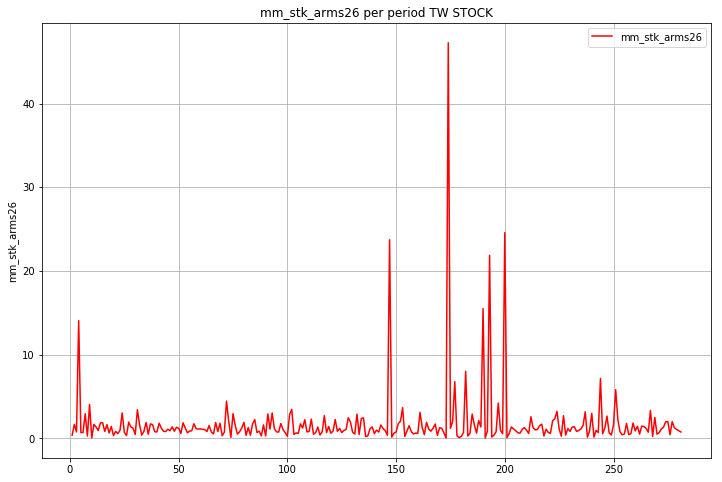

In [0]:
fig = plt.figure(figsize=(12,8))
plt.plot(mm_stk_arms26,'r',label='mm_stk_arms26')
plt.title('mm_stk_arms26 per period TW STOCK')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('mm_stk_arms26')
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller
from scipy import signal
mm_stk_ad9=stk_ad9.shift(1)/stk_ad9
mm_stk_ad9=mm_stk_ad9[1:]
temp = np.array(mm_stk_ad9)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-16.9047
p-value,1.02131e-29
Lags Used,0
Number of Observations Used,280
Critical Value(1%),-3.45392
Critical Value(5%),-2.87192
Critical Value(10%),-2.5723


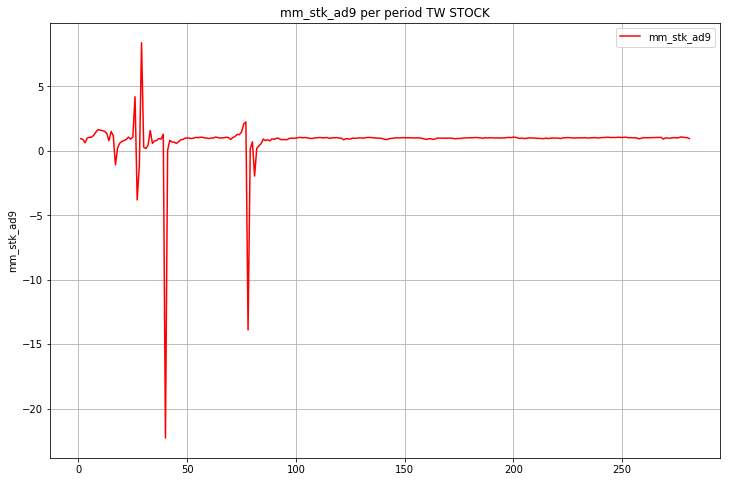

In [0]:
fig = plt.figure(figsize=(12,8))
plt.plot(mm_stk_ad9,'r',label='mm_stk_ad9')
plt.title('mm_stk_ad9 per period TW STOCK')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('mm_stk_ad9')
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller
from scipy import signal
mm_stk_ad26=stk_ad26.shift(1)/stk_ad26
mm_stk_ad26=mm_stk_ad26[1:]
temp = np.array(mm_stk_ad26)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-4.86692
p-value,4.04318e-05
Lags Used,8
Number of Observations Used,272
Critical Value(1%),-3.45462
Critical Value(5%),-2.87223
Critical Value(10%),-2.57246


In [0]:
len(stk_adj_ratio[25:])


282

In [0]:
len(stk_hilo9)

282

In [0]:
result = sm.tsa.stattools.coint(stk_adj_ratio[25:],stk_hilo9)
pvalue = result[1]
pvalue

0.0

In [0]:
result = sm.tsa.stattools.coint(stk_adj_ratio[25:],stk_hilo26)
pvalue = result[1]
pvalue

0.0

In [0]:
result = sm.tsa.stattools.coint(stk_adj_ratio[25:],stk_arms9)
pvalue = result[1]
pvalue

0.0

In [0]:
result = sm.tsa.stattools.coint(stk_adj_ratio[26:],mm_stk_arms26)
pvalue = result[1]
pvalue

0.0

In [0]:
result = sm.tsa.stattools.coint(stk_adj_ratio[26:],mm_stk_ad9)
pvalue = result[1]
pvalue

0.0

In [0]:
result = sm.tsa.stattools.coint(stk_adj_ratio[26:],mm_stk_ad26)
pvalue = result[1]
pvalue

0.0

In [0]:
from scipy.ndimage.interpolation import shift
all_date = {
    'stk_date':np.array(stk_date[26:]),
}
all_stk_adj_ratio = {
    'stk_adj_ratio': np.array(stk_adj_ratio[26:]), 
}
all_data = { 
            'stk_hilo9': np.array(stk_hilo9[1:]),
            'stk_hilo26':np.array(stk_hilo26[1:]),
            'stk_hilo26_lag1': shift(stk_hilo26[1:],1),
            'stk_arms9':np.array(stk_arms9[1:]),
            'stk_arms9_lag1': shift(stk_arms9[1:],1),
            'stk_arms9_lag2': shift(stk_arms9[1:],2),
            'stk_arms9_lag3': shift(stk_arms9[1:],3),
            'mm_stk_arms26':mm_stk_arms26,
            'mm_stk_arms26_lag1': shift(mm_stk_arms26,1),
            'mm_stk_arms26_lag2': shift(mm_stk_arms26,2),
            'mm_stk_ad9':mm_stk_ad9,
            'mm_stk_ad26':mm_stk_ad26,
            'mm_stk_ad26_lag1': shift(mm_stk_ad26,1),
            'mm_stk_ad26_lag2': shift(mm_stk_ad26,2),
            'mm_stk_ad26_lag3': shift(mm_stk_ad26,3),
            'mm_stk_ad26_lag4': shift(mm_stk_ad26,4),
            'mm_stk_ad26_lag5': shift(mm_stk_ad26,5),
            'mm_stk_ad26_lag6': shift(mm_stk_ad26,6),
            'mm_stk_ad26_lag7': shift(mm_stk_ad26,7),
            'mm_stk_ad26_lag8': shift(mm_stk_ad26,8),
            }
all_data = pd.DataFrame(all_data)
all_data = all_data[8:]
all_data.head(20)

,stk_hilo9,stk_hilo26,stk_hilo26_lag1,stk_arms9,stk_arms9_lag1,stk_arms9_lag2,stk_arms9_lag3,mm_stk_arms26,mm_stk_arms26_lag1,mm_stk_arms26_lag2,mm_stk_ad9,mm_stk_ad26,mm_stk_ad26_lag1,mm_stk_ad26_lag2,mm_stk_ad26_lag3,mm_stk_ad26_lag4,mm_stk_ad26_lag5,mm_stk_ad26_lag6,mm_stk_ad26_lag7,mm_stk_ad26_lag8
9,0.969697,0.921875,0.900000,3.185298,0.375262,0.063540,0.240129,4.033733,0.266043,2.933683,1.652632,1.043619,1.043344,1.035608,1.019341,1.016866,0.984796,0.605614,0.881808,0.943495
10,0.928910,0.873239,0.921875,3.744965,3.185298,0.375262,0.063540,0.042466,4.033733,0.266043,1.615646,1.044726,1.043619,1.043344,1.035608,1.019341,1.016866,0.984796,0.605614,0.881808
11,0.868966,0.840000,0.873239,1.216690,3.744965,3.185298,0.375262,1.656127,0.042466,4.033733,1.572193,1.029540,1.044726,1.043619,1.043344,1.035608,1.019341,1.016866,0.984796,0.605614
12,0.632231,0.727273,0.840000,1.062827,1.216690,3.744965,3.185298,1.350498,1.656127,0.042466,1.520325,1.026762,1.029540,1.044726,1.043619,1.043344,1.035608,1.019341,1.016866,0.984796
13,0.572052,0.750000,0.727273,0.560671,1.062827,1.216690,3.744965,0.915317,1.350498,1.656127,1.366667,1.027498,1.026762,1.029540,1.044726,1.043619,1.043344,1.035608,1.019341,1.016866
14,0.462006,0.786667,0.750000,0.570679,0.560671,1.062827,1.216690,1.843689,0.915317,1.350498,0.782609,1.041031,1.027498,1.026762,1.029540,1.044726,1.043619,1.043344,1.035608,1.019341
15,0.565657,0.813333,0.786667,0.219582,0.570679,0.560671,1.062827,1.858850,1.843689,0.915317,1.513158,1.046953,1.041031,1.027498,1.026762,1.029540,1.044726,1.043619,1.043344,1.035608
16,0.519298,0.791209,0.813333,0.211754,0.219582,0.570679,0.560671,0.814652,1.858850,1.843689,1.169231,1.055907,1.046953,1.041031,1.027498,1.026762,1.029540,1.044726,1.043619,1.043344
17,0.683284,0.878788,0.791209,0.368845,0.211754,0.219582,0.570679,1.631620,0.814652,1.858850,-1.083333,1.085911,1.055907,1.046953,1.041031,1.027498,1.026762,1.029540,1.044726,1.043619
18,0.779762,0.845361,0.878788,0.319100,0.368845,0.211754,0.219582,0.628963,1.631620,0.814652,0.241935,1.083127,1.085911,1.055907,1.046953,1.041031,1.027498,1.026762,1.029540,1.044726


In [0]:
all_date = pd.DataFrame(all_date)
all_date = all_date[8:]
all_date.head(20)

,stk_date
8,2018-02-27
9,2018-03-01
10,2018-03-02
11,2018-03-05
12,2018-03-06
13,2018-03-07
14,2018-03-08
15,2018-03-09
16,2018-03-12
17,2018-03-13


In [0]:
all_stk_adj_ratio = pd.DataFrame(all_stk_adj_ratio)
all_stk_adj_ratio = all_stk_adj_ratio[8:]
all_stk_adj_ratio.head(20)

,stk_adj_ratio
8,-0.017964
9,-0.004098
10,0.000000
11,-0.004124
12,0.018330
13,-0.004032
14,0.000000
15,0.002000
16,0.007937
17,0.013699


In [0]:
all_data.shape

(273, 20)

In [0]:
all_stk_adj_ratio.describe()

,stk_adj_ratio
count,273.000000
mean,0.000168
std,0.010454
min,-0.030905
25%,-0.006303
50%,0.000000
75%,0.006682
max,0.032680


In [0]:
label = all_stk_adj_ratio>=0.0

In [0]:
x_train = all_data[:172]
x_test = all_data[172:-1]
y_train = label[1:173]
y_test = label[173:]

In [318]:
y_train.describe()

,stk_adj_ratio
count,172
unique,2
top,True
freq,88


In [319]:
y_test.describe()

,stk_adj_ratio
count,100
unique,2
top,True
freq,60


In [320]:
from sklearn.svm import SVC
model = SVC()

#使用Support Vector Classifier來建立模型
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [323]:
predictions = model.predict(x_test)

#載入classification_report & confusion_matrix來評估模型好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

#載入classification_report & confusion_matrix來評估模型好壞
#from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_test,predictions))
#print('\n')
#print(classification_report(y_test,predictions))



[[17 23]
 [20 40]]


              precision    recall  f1-score   support

       False       0.46      0.42      0.44        40
        True       0.63      0.67      0.65        60

    accuracy                           0.57       100
   macro avg       0.55      0.55      0.55       100
weighted avg       0.56      0.57      0.57       100



In [324]:
predictions

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True, False,  True,  True,  True, False,  True, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True])

In [325]:
len(all_stk_adj_ratio[172:])

101

In [326]:
len(predictions)

100

In [329]:
add1_all_stk_adj_ratio=all_stk_adj_ratio[172:]+1
add1_all_stk_adj_ratio.head(5)

,stk_adj_ratio
180,1.002137
181,1.004292
182,0.995789
183,0.985075
184,1.006522


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


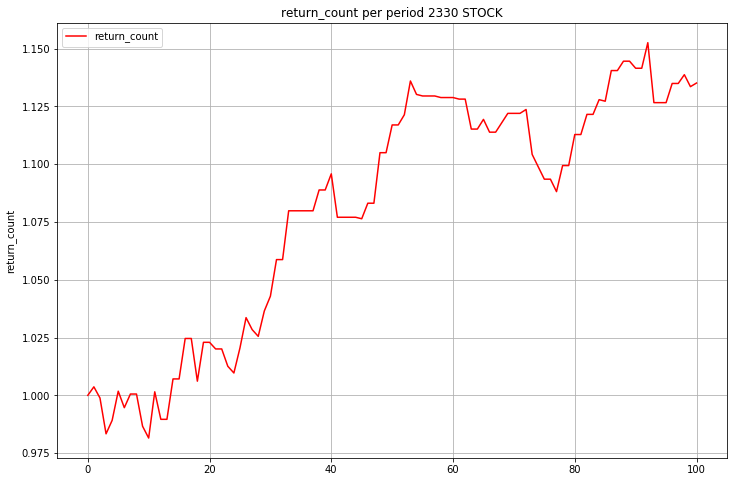

In [341]:
return_count = []
return_count.append(1.0)
for i in range(1,len(add1_all_stk_adj_ratio)):
    if predictions[i-1]==True:
        return_count.append(return_count[i-1]*add1_all_stk_adj_ratio.as_matrix()[i]*0.9994)
    else:
        return_count.append(return_count[i-1])
return_count
fig = plt.figure(figsize=(12,8))
plt.plot(return_count,'r',label='return_count')
plt.title('return_count per period 2330 STOCK')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('return_count')
plt.show()

In [342]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Bitcoin_Cash_Investing.csv to Bitcoin_Cash_Investing.csv
Saving Bitcoin_Investing.csv to Bitcoin_Investing.csv
Saving Ethereum_Investing.csv to Ethereum_Investing.csv
Saving Litecoin_Investing.csv to Litecoin_Investing.csv
Saving XRP_Investing.csv to XRP_Investing.csv
User uploaded file "Bitcoin_Cash_Investing.csv" with length 51487 bytes
User uploaded file "Bitcoin_Investing.csv" with length 69329 bytes
User uploaded file "Ethereum_Investing.csv" with length 64946 bytes
User uploaded file "Litecoin_Investing.csv" with length 65329 bytes
User uploaded file "XRP_Investing.csv" with length 69369 bytes


In [0]:
btc_data=pd.read_csv('Bitcoin_Investing.csv')
eth_data=pd.read_csv('Ethereum_Investing.csv')
ltc_data=pd.read_csv('Litecoin_Investing.csv')
xrp_data=pd.read_csv('XRP_Investing.csv')
bch_data=pd.read_csv('Bitcoin_Cash_Investing.csv')

btc_data.sort_values(by='日期')
eth_data.sort_values(by='日期')
ltc_data.sort_values(by='日期')
xrp_data.sort_values(by='日期')
bch_data.sort_values(by='日期')

btc_data_open = btc_data[:]['最新'].str.replace(',','').astype(float)
btc_data_high = btc_data[:]['高'].str.replace(',','').astype(float)
btc_data_low = btc_data[:]['低'].str.replace(',','').astype(float)
btc_data_close = btc_data[:]['開市'].str.replace(',','').astype(float)
btc_data_vol = btc_data[:]['成交量']
btc_data_date = btc_data[:]['日期']

eth_data_open = eth_data[:]['最新'].str.replace(',','').astype(float)
eth_data_high = eth_data[:]['高'].str.replace(',','').astype(float)
eth_data_low = eth_data[:]['低'].str.replace(',','').astype(float)
eth_data_close = eth_data[:]['開市'].str.replace(',','').astype(float)
eth_data_vol = eth_data[:]['成交量']
eth_data_date = eth_data[:]['日期']

ltc_data_open = ltc_data[:]['最新'].astype(str).str.replace(',','').astype(float)
ltc_data_high = ltc_data[:]['高'].astype(str).str.replace(',','').astype(float)
ltc_data_low = ltc_data[:]['低'].astype(str).str.replace(',','').astype(float)
ltc_data_close = ltc_data[:]['開市'].astype(str).str.replace(',','').astype(float)
ltc_data_vol = ltc_data[:]['成交量']
ltc_data_date = ltc_data[:]['日期']

xrp_data_open = xrp_data[:]['最新'].astype(str).str.replace(',','').astype(float)
xrp_data_high = xrp_data[:]['高'].astype(str).str.replace(',','').astype(float)
xrp_data_low = xrp_data[:]['低'].astype(str).str.replace(',','').astype(float)
xrp_data_close = xrp_data[:]['開市'].astype(str).str.replace(',','').astype(float)
xrp_data_vol = xrp_data[:]['成交量']
xrp_data_date = xrp_data[:]['日期']

bch_data_open = bch_data[:]['最新'].str.replace(',','').astype(float)
bch_data_high = bch_data[:]['高'].str.replace(',','').astype(float)
bch_data_low = bch_data[:]['低'].str.replace(',','').astype(float)
bch_data_close = bch_data[:]['開市'].str.replace(',','').astype(float)
bch_data_vol = bch_data[:]['成交量']
bch_data_date = bch_data[:]['日期']

In [0]:
def convert_si_to_number(x):
    total_stars = 0
    if 'K' in x:
        if len(x) > 1:
            total_stars = float(x.replace('K', '')) * 1000 # convert k to a thousand
    elif 'M' in x:
        if len(x) > 1:
            total_stars = float(x.replace('M', '')) * 1000000 # convert M to a million
    elif 'B' in x:
        total_stars = float(x.replace('B', '')) * 1000000000 # convert B to a Billion
    else:
        if len(x) == 1 :
            total_stars = 0
        else:
            total_stars = float(x)*1 # Less than 1000
    
    return int(total_stars)

In [424]:
for i in range(0,len(btc_data_vol)):
    convert_si_to_number(btc_data_vol.as_matrix()[i])
    
for i in range(0,len(eth_data_vol)):
    convert_si_to_number(eth_data_vol.as_matrix()[i])
    
for i in range(0,len(ltc_data_vol)):
    convert_si_to_number(ltc_data_vol.as_matrix()[i])

for i in range(0,len(xrp_data_vol)):
    convert_si_to_number(xrp_data_vol.as_matrix()[i])
    
for i in range(0,len(bch_data_vol)):
    convert_si_to_number(bch_data_vol.as_matrix()[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
btc_data_return = (btc_data_close-btc_data_open)/btc_data_open
eth_data_return = (eth_data_close-eth_data_open)/eth_data_open
ltc_data_return = (ltc_data_close-ltc_data_open)/ltc_data_open
xrp_data_return = (xrp_data_close-xrp_data_open)/xrp_data_open
bch_data_return = (bch_data_close-bch_data_open)/bch_data_open

In [402]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(btc_data_return)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-11.0202
p-value,6.01468e-20
Lags Used,5
Number of Observations Used,883
Critical Value(1%),-3.43778
Critical Value(5%),-2.86482
Critical Value(10%),-2.56852


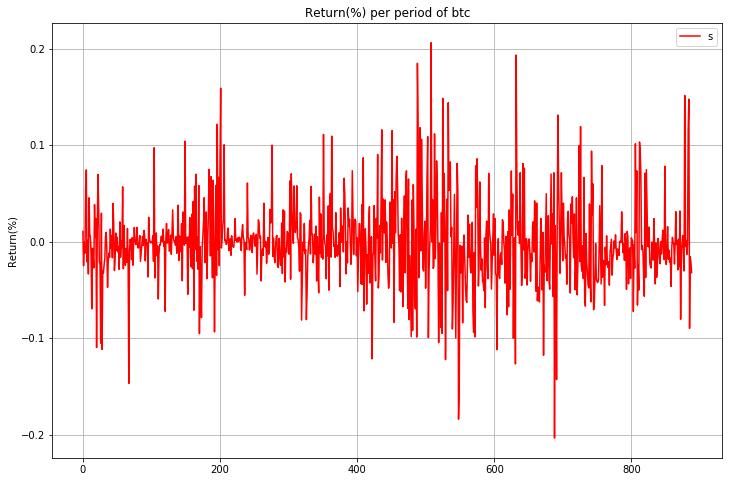

In [403]:
fig = plt.figure(figsize=(12,8))
plt.plot(btc_data_return,'r',label='s')
plt.title('Return(%) per period of btc')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Return(%)')
plt.show()

In [405]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(eth_data_return)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-10.1743
p-value,6.95589e-18
Lags Used,5
Number of Observations Used,883
Critical Value(1%),-3.43778
Critical Value(5%),-2.86482
Critical Value(10%),-2.56852


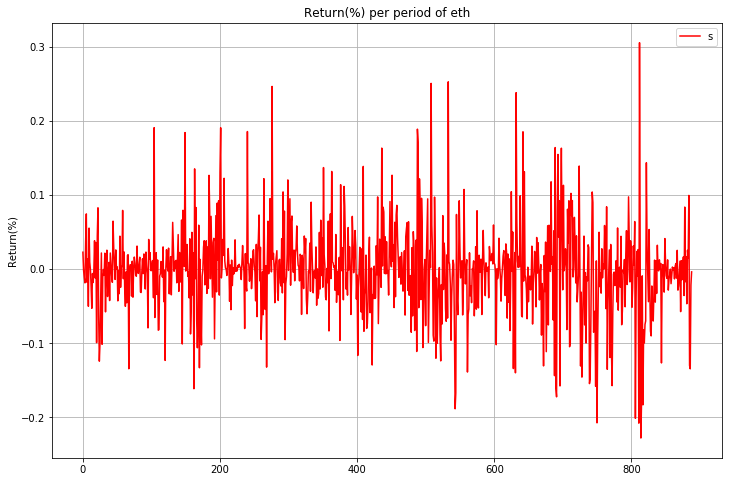

In [406]:
fig = plt.figure(figsize=(12,8))
plt.plot(eth_data_return,'r',label='s')
plt.title('Return(%) per period of eth')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Return(%)')
plt.show()

In [426]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(ltc_data_return)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-10.7321
p-value,2.962e-19
Lags Used,5
Number of Observations Used,883
Critical Value(1%),-3.43778
Critical Value(5%),-2.86482
Critical Value(10%),-2.56852


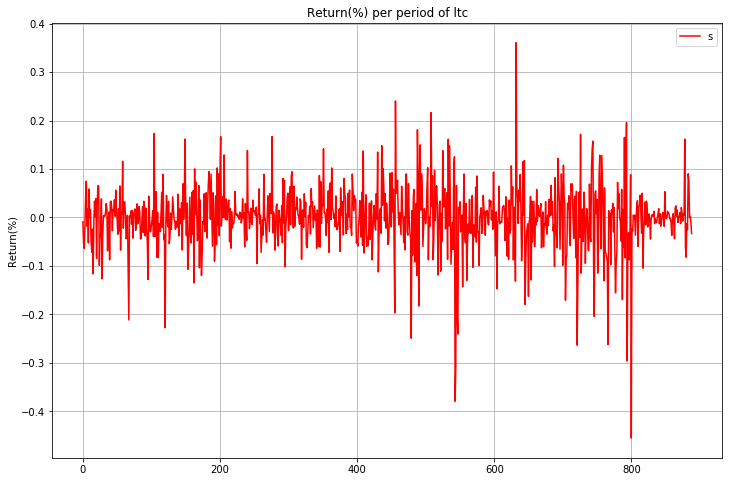

In [427]:
fig = plt.figure(figsize=(12,8))
plt.plot(ltc_data_return,'r',label='s')
plt.title('Return(%) per period of ltc')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Return(%)')
plt.show()

In [410]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(xrp_data_return)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-6.42245
p-value,1.77773e-08
Lags Used,17
Number of Observations Used,871
Critical Value(1%),-3.43788
Critical Value(5%),-2.86486
Critical Value(10%),-2.56854


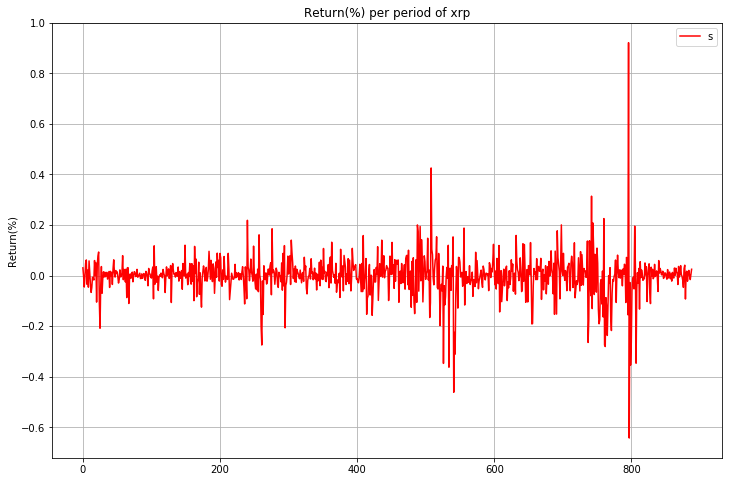

In [411]:
fig = plt.figure(figsize=(12,8))
plt.plot(xrp_data_return,'r',label='s')
plt.title('Return(%) per period of xrp')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Return(%)')
plt.show()

In [412]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(bch_data_return)
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-23.2396
p-value,0
Lags Used,0
Number of Observations Used,674
Critical Value(1%),-3.44009
Critical Value(5%),-2.86584
Critical Value(10%),-2.56906


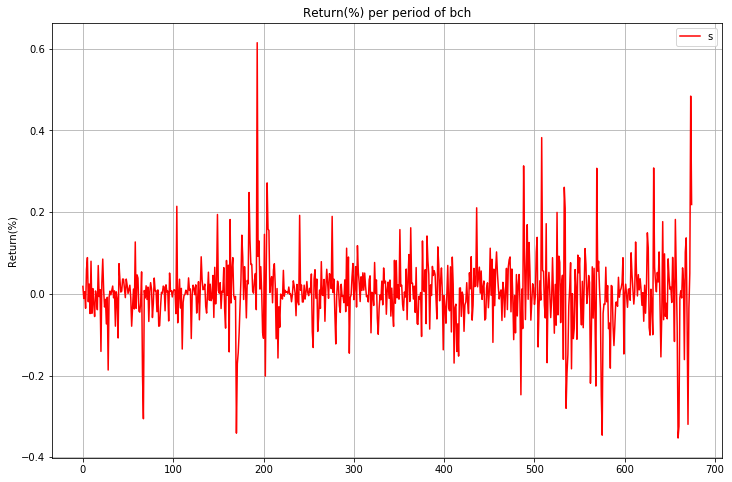

In [413]:
fig = plt.figure(figsize=(12,8))
plt.plot(bch_data_return,'r',label='s')
plt.title('Return(%) per period of bch')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Return(%)')
plt.show()

In [414]:
len(btc_data_return)

889

In [415]:
len(eth_data_return)

889

In [428]:
len(ltc_data_return)

889

In [417]:
len(xrp_data_return)

889

In [418]:
len(bch_data_return)

675

In [419]:
result = sm.tsa.stattools.coint(btc_data_return,eth_data_return)
pvalue = result[1]
pvalue

8.652017271869852e-27

In [429]:
result = sm.tsa.stattools.coint(btc_data_return,ltc_data_return)
pvalue = result[1]
pvalue

4.708079772040123e-12

In [421]:
result = sm.tsa.stattools.coint(btc_data_return,xrp_data_return)
pvalue = result[1]
pvalue

6.769277737900365e-23

In [439]:
result = sm.tsa.stattools.coint(btc_data_return[214:],bch_data_return)
pvalue = result[1]
pvalue

0.0

In [546]:
import math
all_date_btc = {
    'btc_data_date':np.array(btc_data_date[214:]),
}
all_btc_data_return = {
    'btc_data_return': np.array(btc_data_return[214:]), 
}
all_data_btc = {
            'eth_data_return': np.array(eth_data_return[214:]),          
            'ltc_data_return': np.array(ltc_data_return[214:]),
            'xrp_data_return': np.array(xrp_data_return[214:]),
            'bch_data_return': bch_data_return,
            }
all_data_btc = pd.DataFrame(all_data_btc)
all_data_btc.head(20)

,eth_data_return,ltc_data_return,xrp_data_return,bch_data_return
0,-0.043366,-0.050247,-0.094902,0.018237
1,0.005649,0.018704,-0.062834,-0.011247
2,-0.054706,-0.063365,-0.026835,0.005016
3,0.012186,0.011875,0.009566,-0.035350
4,-0.022155,-0.021676,-0.002016,0.059957
5,0.002119,-0.012728,-0.014513,0.088708
6,-0.006647,-0.012534,-0.013734,-0.019408
7,-0.002837,-0.000142,-0.006819,0.023972
8,0.039533,0.053616,0.044686,-0.048311
9,-0.003073,0.007291,-0.008579,0.079798


In [547]:
all_date_btc = pd.DataFrame(all_date_btc)
all_date_btc.head(20)

,btc_data_date
0,2018年11月6日
1,2018年11月5日
2,2018年11月4日
3,2018年11月3日
4,2018年11月2日
5,2018年11月1日
6,2018年10月31日
7,2018年10月30日
8,2018年10月29日
9,2018年10月28日


In [548]:
all_btc_data_return = pd.DataFrame(all_btc_data_return)
all_btc_data_return.head(20)

,btc_data_return
0,-0.006520
1,0.002864
2,-0.014201
3,0.005997
4,-0.003767
5,-0.005406
6,-0.005969
7,0.001739
8,0.023852
9,0.001310


In [549]:
all_data_btc.shape

(675, 4)

In [550]:
all_btc_data_return.describe()

,btc_data_return
count,675.000000
mean,-0.001764
std,0.046394
min,-0.203559
25%,-0.025382
50%,-0.003859
75%,0.016580
max,0.206161


In [0]:
label_btc = all_btc_data_return.shift(1) >= 0.0

In [0]:
x_train_btc = all_data_btc[:449]
x_test_btc = all_data_btc[449:-1]
y_train_btc = label_btc[1:450]
y_test_btc = label_btc[450:]

In [559]:
y_train_btc.describe()

,btc_data_return
count,449
unique,2
top,False
freq,233


In [560]:
y_test_btc.describe()

,btc_data_return
count,225
unique,2
top,False
freq,144


In [561]:
from sklearn.svm import SVC
model = SVC()

#使用Support Vector Classifier來建立模型
model.fit(x_train_btc,y_train_btc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [562]:
predictions = model.predict(x_test_btc)

#載入classification_report & confusion_matrix來評估模型好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_btc,predictions))
print('\n')
print(classification_report(y_test_btc,predictions))

#載入classification_report & confusion_matrix來評估模型好壞
#from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_test,predictions))
#print('\n')
#print(classification_report(y_test,predictions))



[[131  13]
 [ 46  35]]


              precision    recall  f1-score   support

       False       0.74      0.91      0.82       144
        True       0.73      0.43      0.54        81

    accuracy                           0.74       225
   macro avg       0.73      0.67      0.68       225
weighted avg       0.74      0.74      0.72       225



In [563]:
predictions

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False,  True,

In [567]:
len(all_btc_data_return[449:])

226

In [0]:
add1_btc_data_return = all_btc_data_return[449:]+1

In [566]:
len(predictions)

225

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


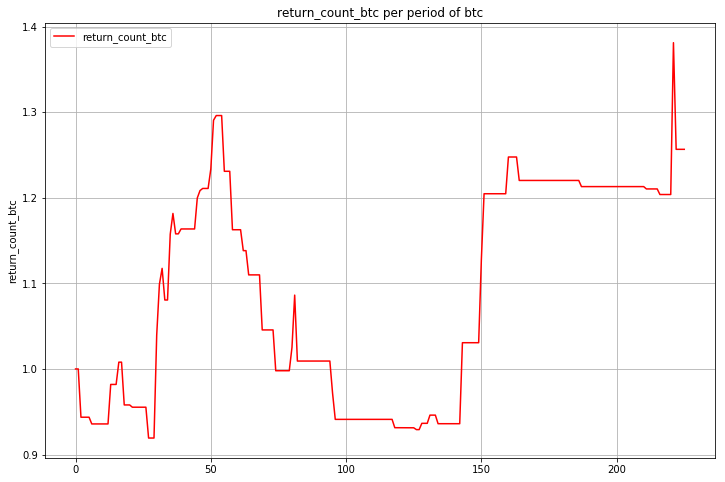

In [585]:
return_count_btc = []
return_count_btc.append(1.0)
for i in range(1,len(add1_btc_data_return)):
    if predictions[i-1]==True:
        return_count_btc.append(return_count_btc[i-1]*add1_btc_data_return.as_matrix()[i]*0.9997)
    else:
        return_count_btc.append(return_count_btc[i-1])
fig = plt.figure(figsize=(12,8))
plt.plot(return_count_btc,'r',label='return_count_btc')
plt.title('return_count_btc per period of btc')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('return_count_btc')
plt.show()

In [0]:
add1_btc_data_return = all_btc_data_return[449:]*(-1)+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


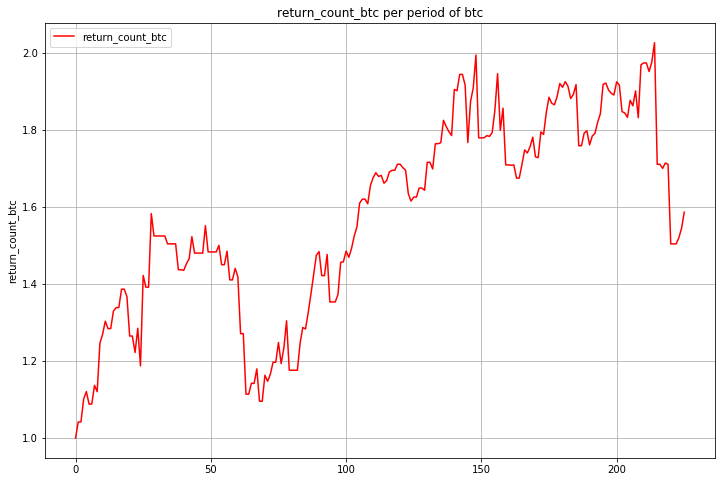

In [587]:
return_count_btc = []
return_count_btc.append(1.0)
for i in range(1,len(add1_btc_data_return)):
    if predictions[i-1]==False:
        return_count_btc.append(return_count_btc[i-1]*add1_btc_data_return.as_matrix()[i]*0.995)
    else:
        return_count_btc.append(return_count_btc[i-1])
fig = plt.figure(figsize=(12,8))
plt.plot(return_count_btc,'r',label='return_count_btc')
plt.title('return_count_btc per period of btc')
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('return_count_btc')
plt.show()